# Student Performance Visualization

The Student Performance Visualization project aims to provide a comprehensive and interactive visualization of student performance data to help educators, administrators, and stakeholders gain valuable insights into student academic achievements and identify areas for improvement. This project leverages data analytics and data visualization techniques to present the information in a user-friendly and intuitive manner.

# Importing Libraries

These are just a few examples of popular Python libraries. You can import any other library using the same import statement followed by the library name or alias:

NumPy: for numerical operations and array manipulation

Pandas: for data manipulation and analysis

Matplotlib: for creating visualizations

Scikit-learn: for machine learning algorithms

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

The Student Performance Dataset includes the following attributes:

 1. Gender
 
 2. Race/Ethnicity
 
 3. Parental Level of Education
 
 4. Lunch Status
 
 5. Test Preparation Course
 
 6. Math Score
 
 7. Reading Score
 
 8. Writing Score
 
These attributes provide valuable information on student demographics, parental education, socioeconomic status, test preparation, and academic performance. Analyzing this dataset can offer insights into educational disparities and guide interventions to improve student outcomes.

In [3]:
dataframe = pd.read_csv('StudentsPerformance.csv')

In [4]:
dataframe.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
dataframe.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


# Visualizing Dataset

Data visualization is the graphical representation of information and data, designed to make complex datasets more accessible, understandable, and interpretable. It involves the use of visual elements such as charts, graphs, maps, and infographics to present data and patterns in a visual format. Data visualization plays a crucial role in data analysis, as it enables users to identify trends, correlations, and insights that might not be immediately evident in raw data.

# Distribution of Math Score

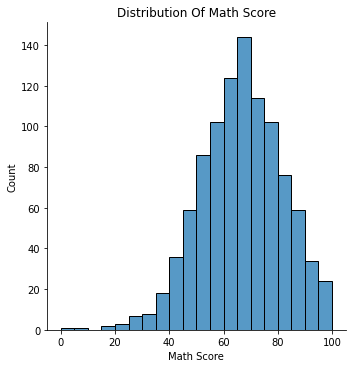

In [7]:
sns.displot(data = dataframe, 
             x = 'math score', 
             kde = False, 
             bins = 20)
plt.xlabel('Math Score')
plt.ylabel('Count')
plt.title('Distribution Of Math Score')
plt.show()

# Distribution of Writing And Reading Score

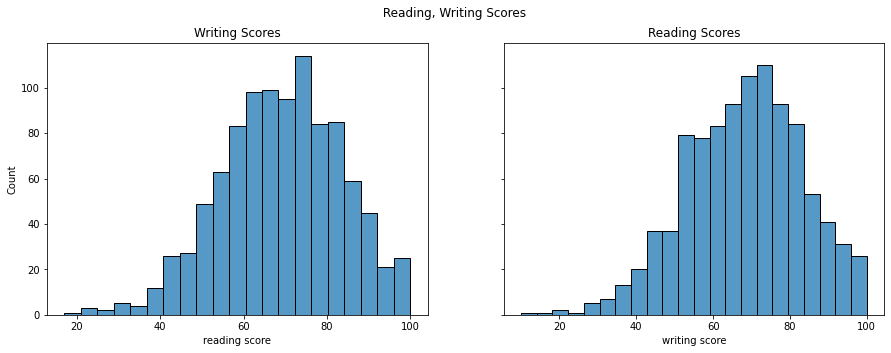

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle(' Reading, Writing Scores')

sns.histplot(dataframe['reading score'], ax=axes[0])
axes[1].set_title('Reading Scores')

sns.histplot(dataframe['writing score'], ax=axes[1])
axes[0].set_title('Writing Scores')

fig.show()

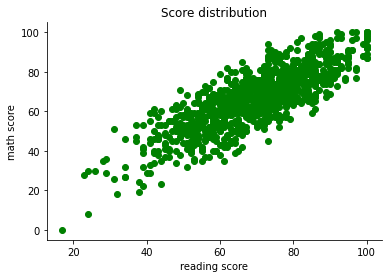

In [11]:
x=dataframe['reading score']
y=dataframe['math score']
plt.scatter(x,y,color='g')
plt.xlabel('reading score')
plt.ylabel('math score')
plt.title('Score distribution')
plt.gca().spines['top'].set_visible(False)  
plt.gca().spines['right'].set_visible(False)
plt.show()

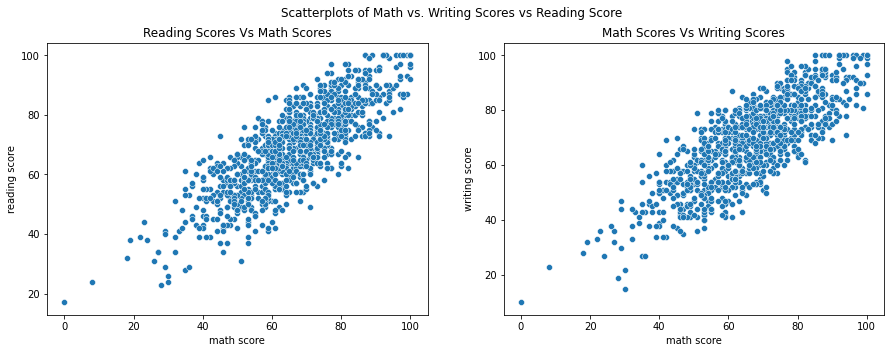

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Scatterplots of Math vs. Writing Scores vs Reading Score')

# Math Scores
sns.scatterplot(x=dataframe['math score'], y=dataframe['reading score'], ax=axes[0])
axes[0].set_title('Reading Scores Vs Math Scores')

# Writing Scores
sns.scatterplot(x=dataframe['math score'], y=dataframe['writing score'], ax=axes[1])
axes[1].set_title('Math Scores Vs Writing Scores')

fig.show()

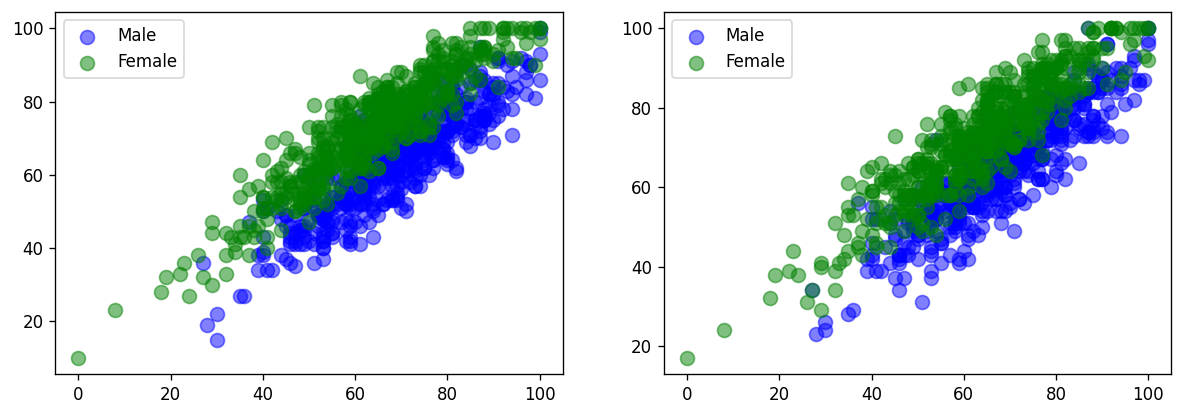

In [23]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4), dpi=120) 

ax[0].scatter(x='math score', y='writing score',data=dataframe[dataframe['gender']=='male'], color='b', alpha=0.5, label='Male', s=70)
ax[0].scatter(x='math score', y='writing score',data=dataframe[dataframe['gender']=='female'], color='g', alpha=0.5, label='Female', s=70)
ax[0].legend()

ax[1].scatter(x='math score', y='reading score',data=dataframe[dataframe['gender']=='male'], color='b', alpha=0.5, label='Male', s=70)
ax[1].scatter(x='math score', y='reading score',data=dataframe[dataframe['gender']=='female'], color='g', alpha=0.5, label='Female', s=70)
ax[1].legend()

# Gender Representation

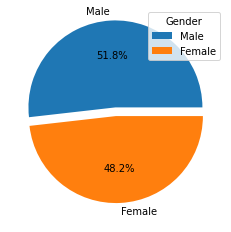

In [31]:
gender_counts=[518,482]
lab=["Male","Female"]
explode = (0.1, 0)  
plt.pie(gender_counts, labels=lab, explode=explode, autopct='%1.1f%%')
plt.legend(title="Gender")
plt.show()

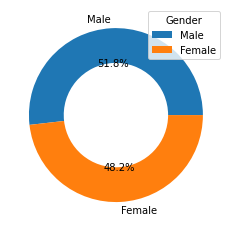

In [32]:
plt.pie(gender_counts, labels=lab, autopct='%1.1f%%', wedgeprops=dict(width=0.4))
plt.legend(title="Gender")
plt.show()

In [35]:
math_group = dataframe.groupby('race/ethnicity')['math score'].sum()
writing_group=dataframe.groupby("race/ethnicity")["writing score"].sum()
reading_group=dataframe.groupby("race/ethnicity")["reading score"].sum()
print(math_group)
print(writing_group)
print(reading_group)

race/ethnicity
group A     5485
group B    12056
group C    20564
group D    17649
group E    10335
Name: math score, dtype: int64
race/ethnicity
group A     5578
group B    12464
group C    21637
group D    18378
group E     9997
Name: writing score, dtype: int64
race/ethnicity
group A     5756
group B    12797
group C    22044
group D    18348
group E    10224
Name: reading score, dtype: int64


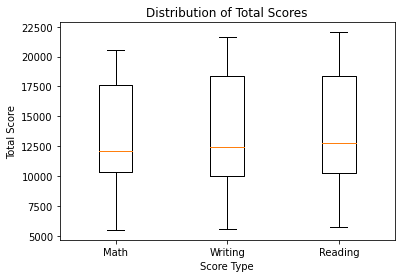

In [36]:
scores = [math_group, writing_group, reading_group]
plt.boxplot(scores, labels=['Math', 'Writing', 'Reading'])
plt.xlabel('Score Type')
plt.ylabel('Total Score')
plt.title('Distribution of Total Scores')
plt.show()

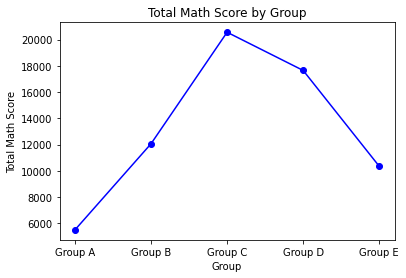

In [40]:
groups = ['Group A', 'Group B', 'Group C', 'Group D', 'Group E']
counts = [89, 190, 319, 262, 140]
plt.plot(groups, math_group, marker='o', color='blue')
plt.xlabel('Group')
plt.ylabel('Total Math Score')
plt.title('Total Math Score by Group')
plt.show()

# Thanks !